In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Reading df model
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)
df_model.drop(['Unnamed: 0'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.2'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.3'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.4'], axis=1, inplace=True)
df_model.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [96]:
### Vehicle-based fuel rates

In [97]:
# Preparation for plotting fuel rate by vehicle  
df_model_aggregated = df_model.groupby(['Vehicle', 'Date']).agg({'Energy': ['sum'],'dist': ['sum'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated.columns = df_model_aggregated.columns.droplevel(1)
df_model_aggregated['fuel_economy']=df_model_aggregated['dist']/df_model_aggregated['Energy']
df_conventional_integerated=df_model_aggregated.loc[df_model_aggregated['Powertrain'] == 'conventional'].copy()
df_hybrid_integerated=df_model_aggregated.loc[df_model_aggregated['Powertrain'] == 'hybrid'].copy()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_21752\2528353200.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Vehicle', y='fuel_economy', data=df_conventional_integerated, hue='VehicleModel', linewidth=5, ci=None)


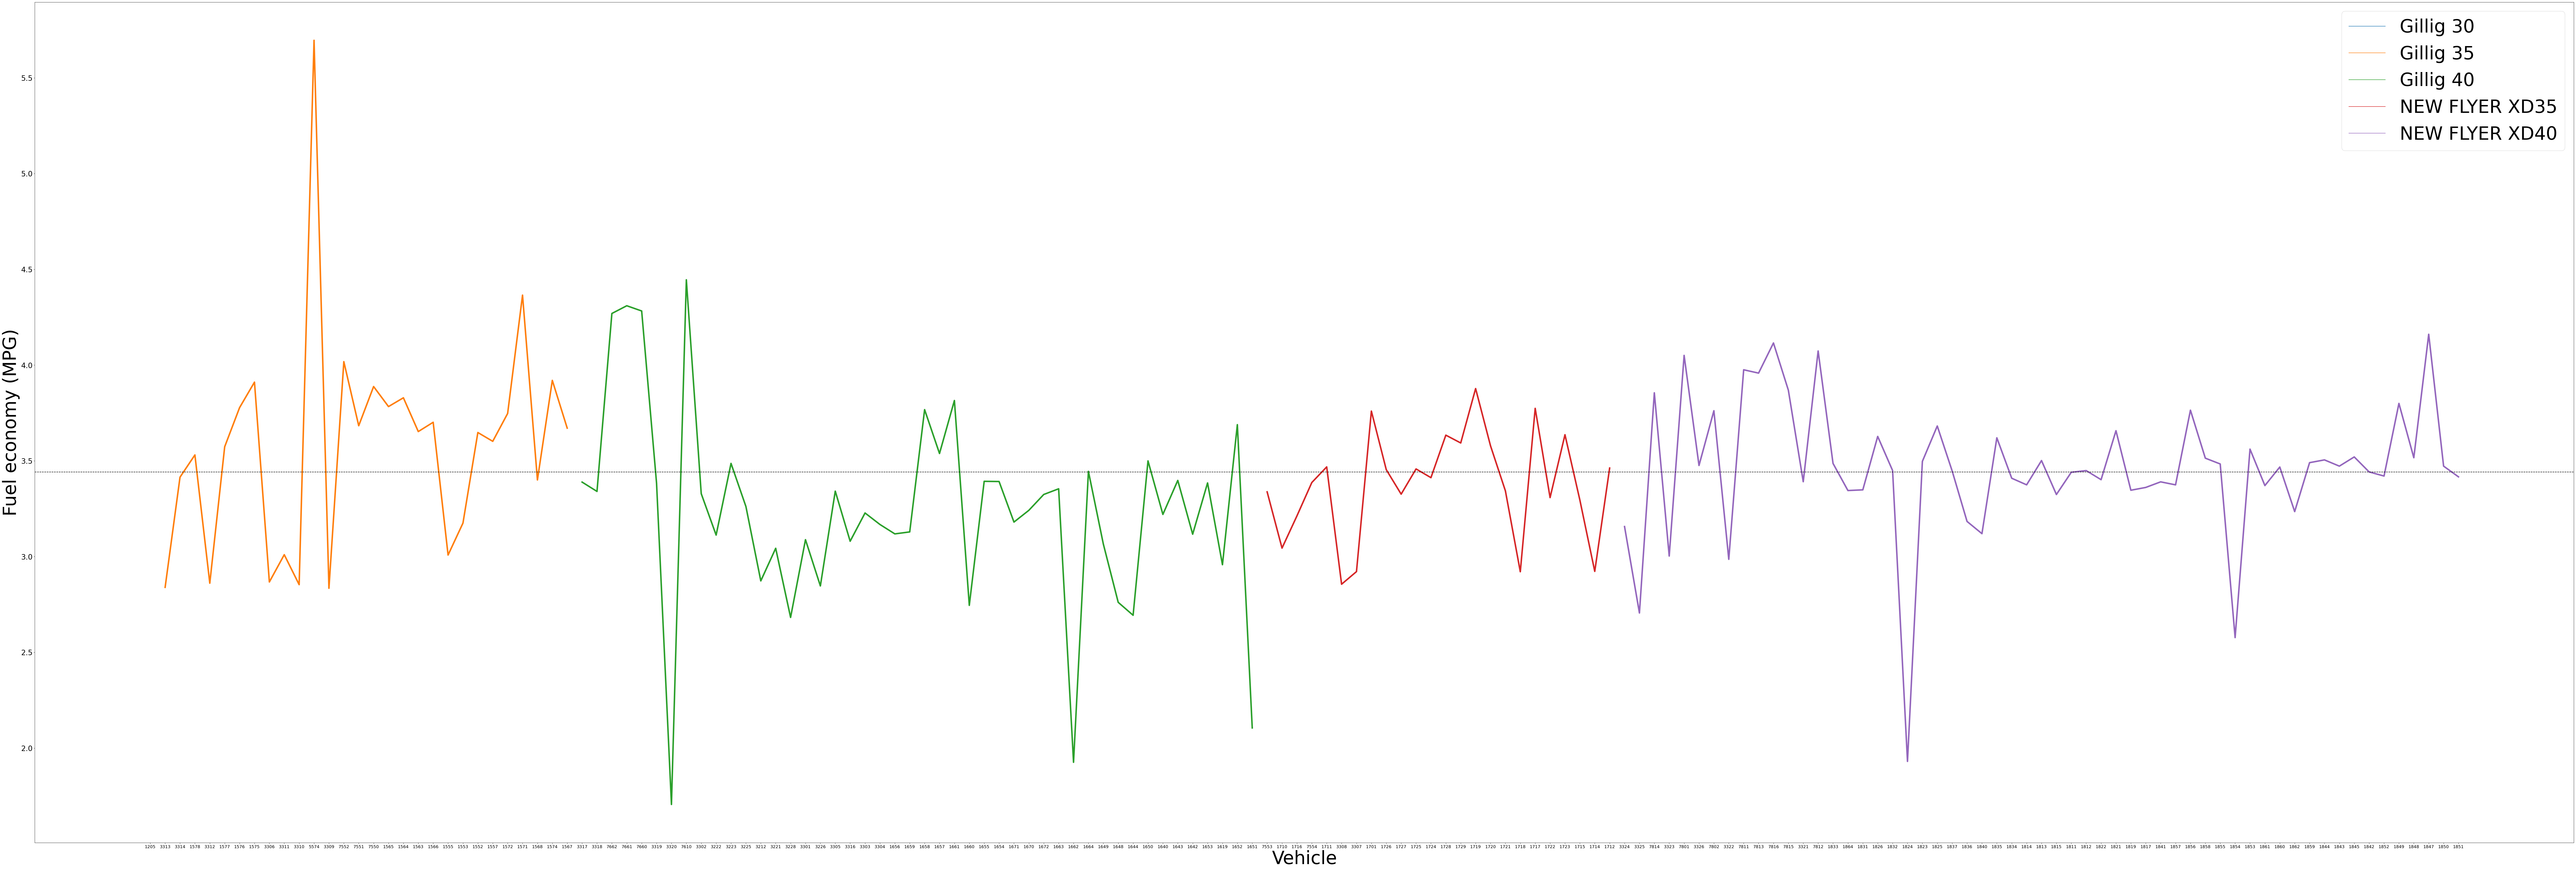

In [98]:
# Plot fuel rate by vehicle (Conventional)
fig, ax = plt.subplots(figsize=(150,50))
df_conventional_integerated.sort_values(by=['VehicleModel'], inplace=True)
df_conventional_integerated['Vehicle'] = df_conventional_integerated.Vehicle.astype(str)
sns.lineplot(x='Vehicle', y='fuel_economy', data=df_conventional_integerated, hue='VehicleModel', linewidth=5, ci=None)
plt.axhline(df_conventional_integerated['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Vehicle', fontsize=60)
plt.ylabel('Fuel economy (MPG)', fontsize=60)
plt.xticks(fontsize=14)
plt.yticks(fontsize=24)
plt.legend(fontsize=60)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-conventional-per-vehicle.png', dpi=400, bbox_inches='tight')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_21752\250797113.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='fuel_economy', data=df_conventional_integerated, hue='VehicleModel', linewidth=3, ci=None)


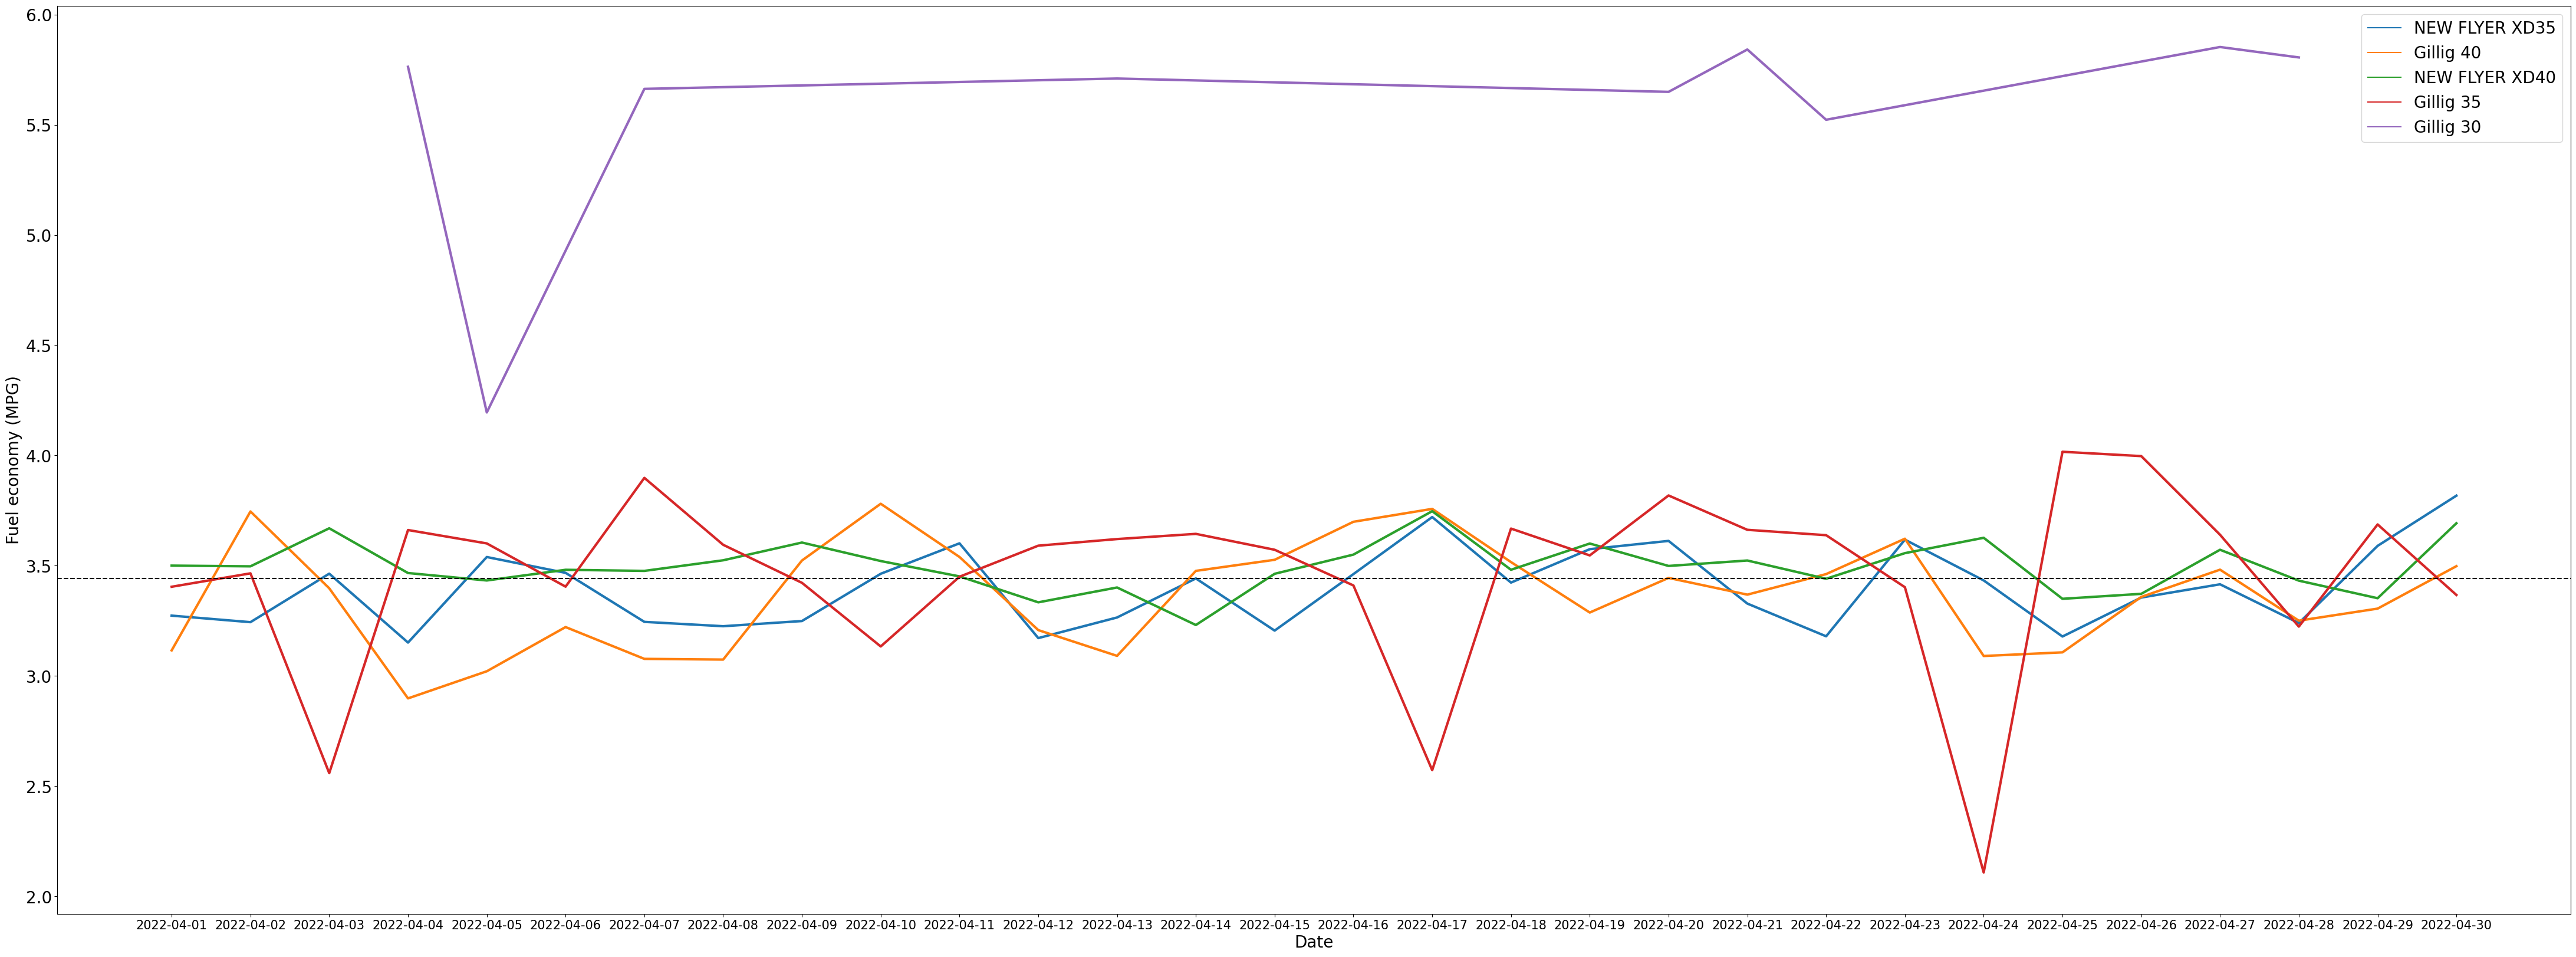

In [99]:
# Plot fuel rate by vehicle (Conventional)
fig, ax = plt.subplots(figsize=(55,20))
df_conventional_integerated.sort_values(by=['Date'], inplace=True)
#df_conventional_integerated['Vehicle'] = df_conventional_integerated.Vehicle.astype(str)
sns.lineplot(x='Date', y='fuel_economy', data=df_conventional_integerated, hue='VehicleModel', linewidth=3, ci=None)
plt.axhline(df_conventional_integerated['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-conventional-per-vehicle.png', dpi=400, bbox_inches='tight')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_21752\4174661597.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Vehicle', y='fuel_economy', data=df_hybrid_integerated, hue='VehicleModel', ci=None)


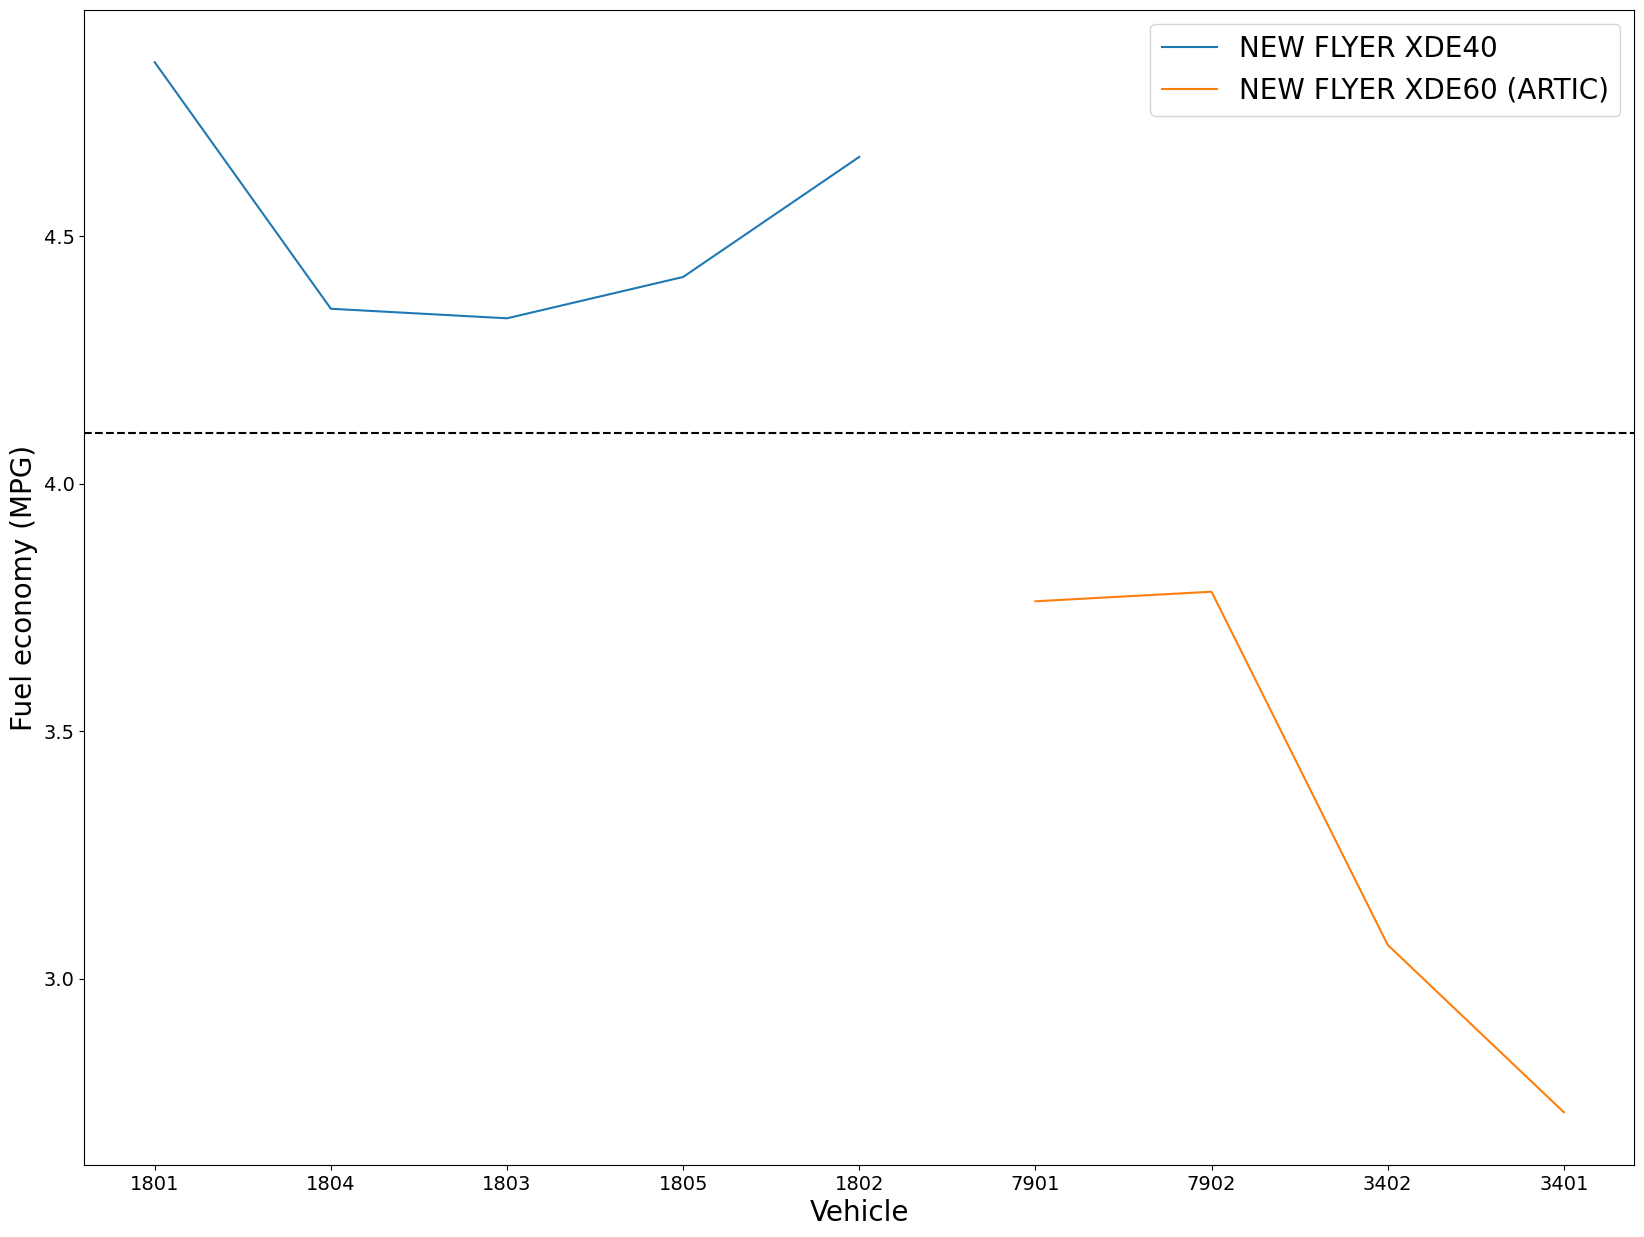

In [100]:
# Plot fuel rate by vehicle (Hybrid)
fig, ax = plt.subplots(figsize=(20,15))
df_hybrid_integerated.sort_values(by=['VehicleModel'], inplace=True)
df_hybrid_integerated['Vehicle'] = df_hybrid_integerated.Vehicle.astype(str)
sns.lineplot(x='Vehicle', y='fuel_economy', data=df_hybrid_integerated, hue='VehicleModel', ci=None)
plt.axhline(df_hybrid_integerated['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Vehicle', fontsize=20)
plt.ylabel('Fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-hybrid-per-vehicle.png', dpi=400, bbox_inches='tight')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_21752\2291276241.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='fuel_economy', data=df_hybrid_integerated, hue='VehicleModel', ci=None)


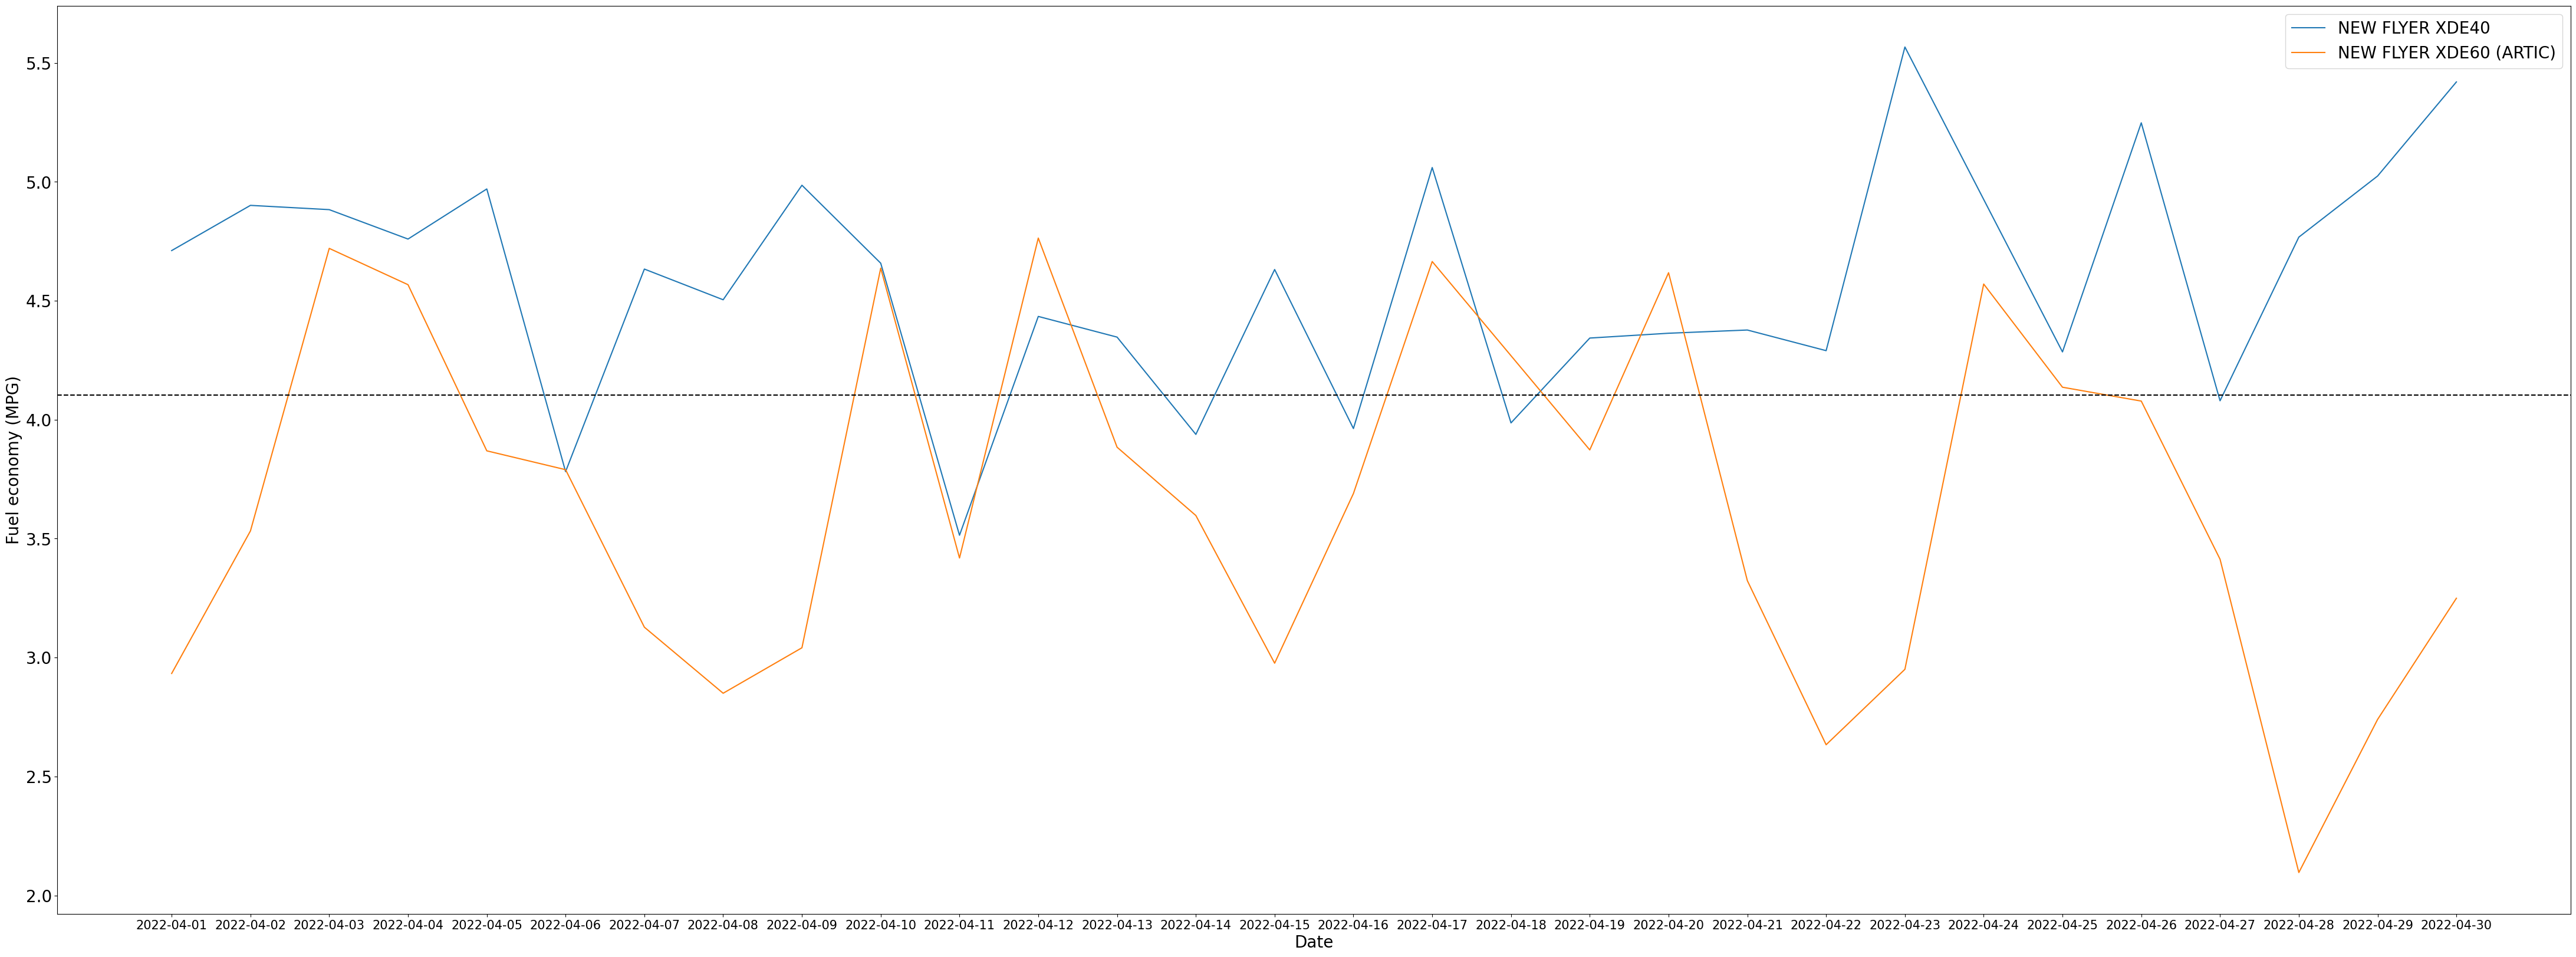

In [101]:
# Plot fuel rate by vehicle (Hybrid)
fig, ax = plt.subplots(figsize=(55,20))
df_hybrid_integerated.sort_values(by=['Date'], inplace=True)
df_hybrid_integerated['Vehicle'] = df_hybrid_integerated.Vehicle.astype(str)
sns.lineplot(x='Date', y='fuel_economy', data=df_hybrid_integerated, hue='VehicleModel', ci=None)
plt.axhline(df_hybrid_integerated['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-hybrid-per-vehicle.png', dpi=400, bbox_inches='tight')

In [102]:
### Route-based fuel rates

In [103]:
# Preparation for plotting fuel rate by routes  
df_model_aggregated_routes = df_model.groupby(['Route', 'Date']).agg({'Energy': ['sum'],'dist': ['sum'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes.columns = df_model_aggregated_routes.columns.droplevel(1)
df_model_aggregated_routes['Date'] = pd.to_datetime(df_model_aggregated_routes['Date'])
df_model_aggregated_routes['dayofweek']=df_model_aggregated_routes['Date'].dt.dayofweek
df_model_aggregated_routes['fuel_economy']=df_model_aggregated_routes['dist']/df_model_aggregated_routes['Energy']
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("X","")
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("(","")
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace(")","")

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_21752\1178906146.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("(","")
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_21752\1178906146.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace(")","")


In [104]:
df_model_aggregated_routes['weekday-weekend'] = df_model_aggregated_routes['dayofweek'].apply(lambda x: 'Sunday' if x == 6  else 'Saturday' if x == 5 else 'Weekday')

In [105]:
df_model_aggregated_routes = df_model_aggregated_routes.groupby(['Route','weekday-weekend']).agg({'fuel_economy': ['mean']}).reset_index()
df_model_aggregated_routes.columns = df_model_aggregated_routes.columns.droplevel(1)

In [106]:
df_model_aggregated_routes

,Route,weekday-weekend,fuel_economy
0,34,Weekday,2.949748
1,38,Saturday,3.342622
2,38,Sunday,3.251280
3,38,Weekday,3.401592
4,39E,Weekday,5.744181
...,...,...,...
95,R42,Saturday,4.928107
96,R42,Weekday,5.132394
97,R44,Saturday,1.883607
98,R44,Sunday,3.068258


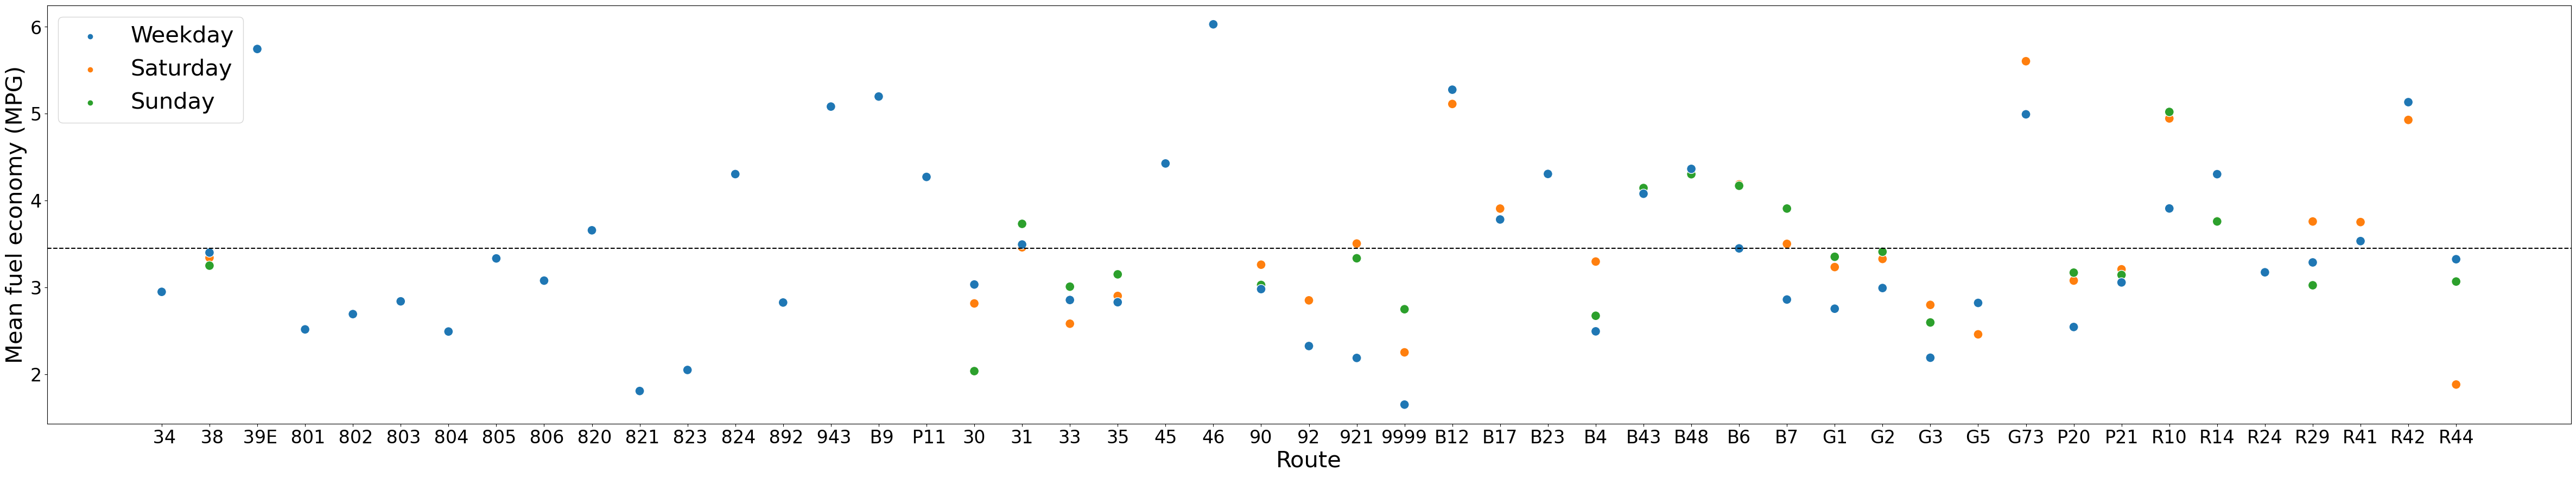

In [107]:
# Plot fuel rate by vehicle 
fig, ax = plt.subplots(figsize=(60,10))
sns.scatterplot(x='Route', y='fuel_economy', data=df_model_aggregated_routes, hue='weekday-weekend', s=150)
plt.axhline(df_model_aggregated_routes['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Route', fontsize=30)
plt.ylabel('Mean fuel economy (MPG)', fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=30)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-per-route.png', dpi=400, bbox_inches='tight')

In [108]:
df_model

,ServiceDateTime,DateKey,CalendarDate,Year,Month,OpKey,Operator,RtKey,RtKey2,Route,...,time_delta_in_seconds,dist,Speed,Acceleration,Powertrain,VehicleModel,Vehicle_mass,elevation,grade,Energy
0,2022-04-04 06:43:24,8763,2022-04-04 00:00:00.000,2022,4,1,VATCo,3519,1006,R44,...,0.0,0.000000,0.000000,0.000000,conventional,Gillig 30,25700,45.0,0.000000,0.000000
1,2022-04-04 06:51:27,8763,2022-04-04 00:00:00.000,2022,4,1,VATCo,3513,3380,(X) 39E,...,483.0,0.627342,0.000000,0.000000,conventional,Gillig 30,25700,66.0,0.020796,0.213849
2,2022-04-04 06:51:27,8763,2022-04-04 00:00:00.000,2022,4,1,VATCo,3519,1006,R44,...,0.0,0.000000,0.000000,0.000000,conventional,Gillig 30,25700,66.0,0.000000,0.000000
3,2022-04-04 06:52:52,8763,2022-04-04 00:00:00.000,2022,4,1,VATCo,3513,3380,(X) 39E,...,85.0,0.313431,21.363553,0.069816,conventional,Gillig 30,25700,51.0,-0.029738,0.037634
4,2022-04-04 06:54:33,8763,2022-04-04 00:00:00.000,2022,4,1,VATCo,3513,3380,(X) 39E,...,101.0,0.421734,24.191762,0.007778,conventional,Gillig 30,25700,51.0,0.000000,0.059599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360782,2022-04-30 23:54:20,8789,2022-04-30 00:00:00.000,2022,4,1,VATCo,3515,1001,B43,...,140.0,0.254140,10.517075,0.003673,hybrid,NEW FLYER XDE60 (ARTIC),42250,53.0,-0.051392,0.049189
1360783,2022-04-30 23:55:24,8789,2022-04-30 00:00:00.000,2022,4,1,VATCo,3515,1001,B43,...,64.0,0.156799,14.194300,0.015960,hybrid,NEW FLYER XDE60 (ARTIC),42250,54.0,0.003961,0.033275
1360784,2022-04-30 23:56:47,8789,2022-04-30 00:00:00.000,2022,4,1,VATCo,3515,1001,B43,...,83.0,0.144950,10.117888,-0.013643,hybrid,NEW FLYER XDE60 (ARTIC),42250,54.0,0.000000,0.032789
1360785,2022-04-30 23:57:32,8789,2022-04-30 00:00:00.000,2022,4,1,VATCo,3515,1001,B43,...,45.0,0.151259,19.474153,0.057755,hybrid,NEW FLYER XDE60 (ARTIC),42250,53.0,-0.004106,0.023855


In [109]:
df_model[['RtKey','RtKey2','Route', 'RouteName','Stop','StopName']].loc[df_model['Route'] == ' 805']

,RtKey,RtKey2,Route,RouteName,Stop,StopName


In [110]:
df_model.loc[df_model['Route'] == ' 805']

,ServiceDateTime,DateKey,CalendarDate,Year,Month,OpKey,Operator,RtKey,RtKey2,Route,...,time_delta_in_seconds,dist,Speed,Acceleration,Powertrain,VehicleModel,Vehicle_mass,elevation,grade,Energy


In [111]:
df_model_aggregated_routes['Route'].unique()

array([' 34', ' 38', ' 39E', ' 801', ' 802', ' 803', ' 804', ' 805',
       ' 806', ' 820', ' 821', ' 823', ' 824', ' 892', ' 943', ' B9',
       ' P11', '30', '31', '33', '35', '45', '46', '90', '92', '921',
       '9999', 'B12', 'B17', 'B23', 'B4', 'B43', 'B48', 'B6', 'B7', 'G1',
       'G2', 'G3', 'G5', 'G73', 'P20', 'P21', 'R10', 'R14', 'R24', 'R29',
       'R41', 'R42', 'R44'], dtype=object)

In [112]:
df_model.columns

Index(['ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Lat', 'Lon', 'Vehicle', 'VehicleType',
       'SeatedCap', 'TotalCap', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second', 'Date', 'Daytype',
       'time', 'time_delta', 'time_delta_in_seconds', 'dist', 'Speed',
       'Acceleration', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'elevation', 'grade', 'Energy'],
      dtype='object')

In [113]:
### Hourly fuel rates

In [114]:
df_model.columns

Index(['ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Lat', 'Lon', 'Vehicle', 'VehicleType',
       'SeatedCap', 'TotalCap', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second', 'Date', 'Daytype',
       'time', 'time_delta', 'time_delta_in_seconds', 'dist', 'Speed',
       'Acceleration', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'elevation', 'grade', 'Energy'],
      dtype='object')

In [115]:
# Preparation for plotting hourly fuel rates 
df_model_aggregated_hours = df_model.groupby(['Date','Hour']).agg({'Energy': ['sum'],'dist': ['sum']}).reset_index()
df_model_aggregated_hours.columns = df_model_aggregated_hours.columns.droplevel(1)
df_model_aggregated_hours['fuel_economy']=df_model_aggregated_hours['dist']/df_model_aggregated_hours['Energy']

In [116]:
df_model_aggregated_hours

,Date,Hour,Energy,dist,fuel_economy
0,2022-04-01,0,20.749040,85.503195,4.120826
1,2022-04-01,1,18.498104,77.856942,4.208915
2,2022-04-01,2,3.434886,18.634679,5.425123
3,2022-04-01,4,0.000000,0.000000,NaN
4,2022-04-01,5,36.040497,192.436325,5.339447
...,...,...,...,...,...
645,2022-04-30,19,94.402235,352.891670,3.738171
646,2022-04-30,20,76.795978,296.412871,3.859745
647,2022-04-30,21,44.869585,199.367465,4.443265
648,2022-04-30,22,21.093549,90.672666,4.298597


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_21752\2748588809.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Energy', data=df_model_aggregated_hours, ci=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


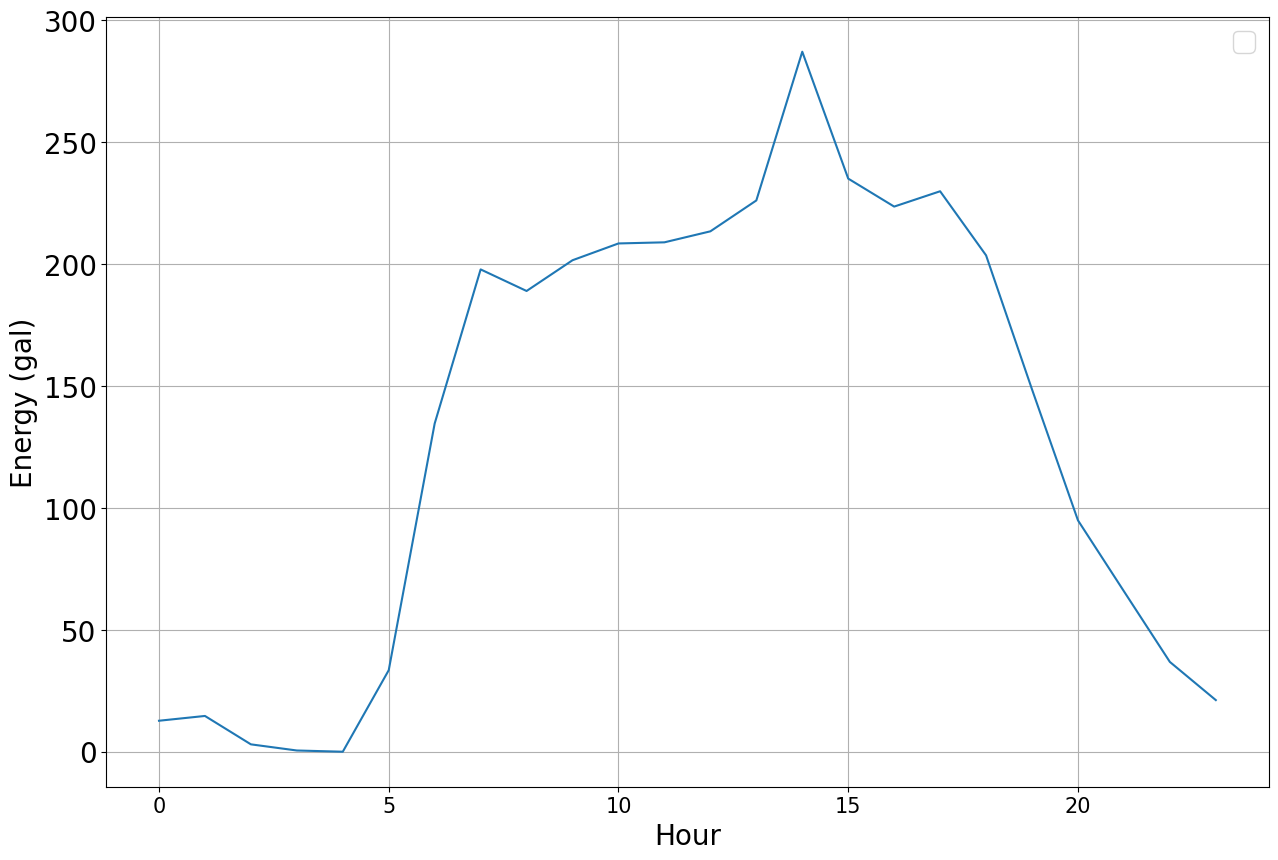

In [117]:
# Plot hourly energy consumption
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Hour', y='Energy', data=df_model_aggregated_hours, ci=None)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Energy (gal)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid()
fig.savefig(r'../../figures/energy-hour.png', dpi=400, bbox_inches='tight')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_21752\2318538876.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='fuel_economy', data=df_model_aggregated_hours, ci=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


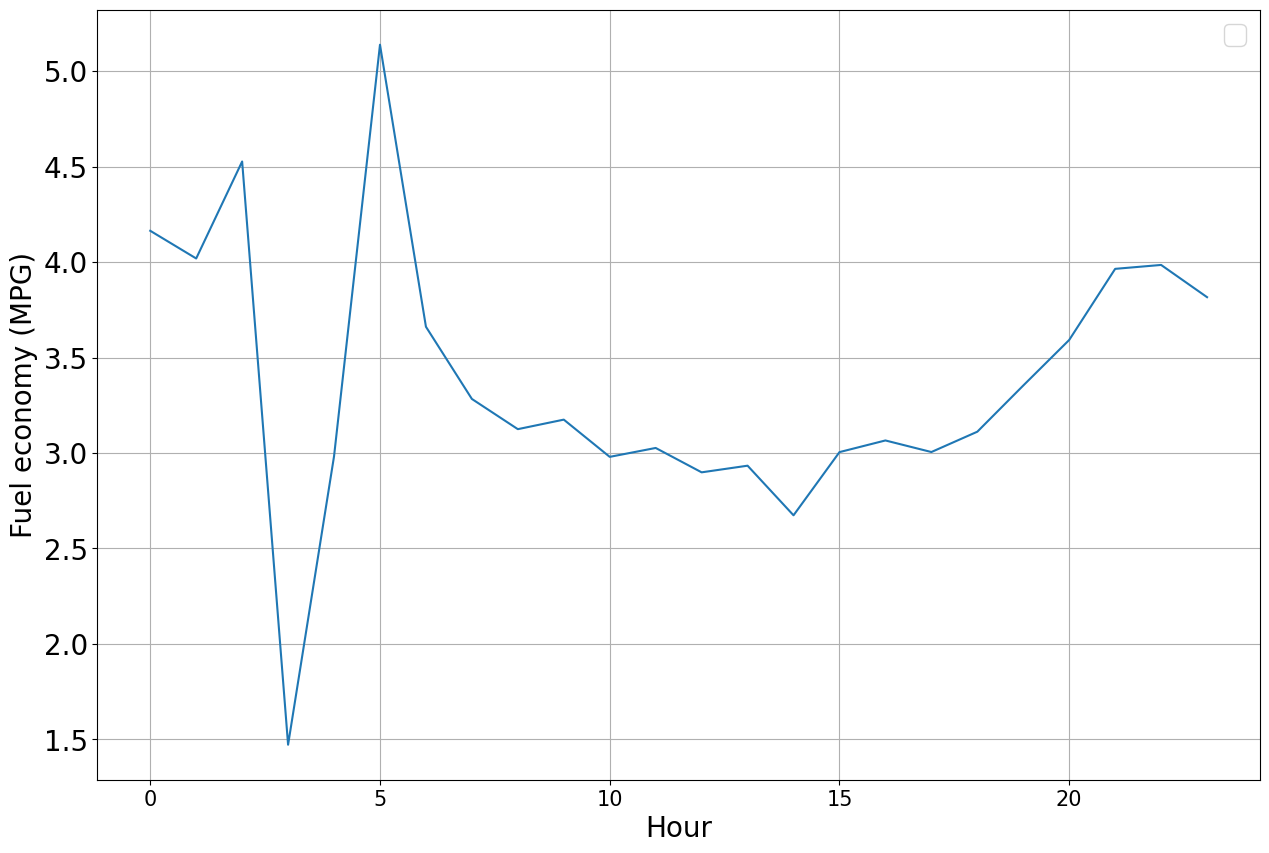

In [118]:
# Plot hourly fuel rate
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Hour', y='fuel_economy', data=df_model_aggregated_hours, ci=None)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid()
fig.savefig(r'../../figures/fuel-rate-hour.png', dpi=400, bbox_inches='tight')

In [137]:
# Plot fuel rate by vehicle
fig, ax = plt.subplots(figsize=(160,50))
df_conventional_integerated['Vehicle'] = df_conventional_integerated.Vehicle.astype(str)
df_conventional_integerated_grouped = df_conventional_integerated.groupby(['Vehicle']).agg({'fuel_economy': ['mean'],'VehicleModel':['max']}).reset_index()
df_conventional_integerated_grouped.columns = df_conventional_integerated_grouped.columns.droplevel(1)
sns.scatterplot(x='Vehicle', y='fuel_economy', data=df_conventional_integerated_grouped, hue='VehicleModel', s=800)
plt.axhline(df_conventional_integerated_grouped['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Vehicle', fontsize=60)
plt.ylabel('Fuel economy (MPG)', fontsize=60)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=80,markerscale=8)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-per-vehicle.png', dpi=400, bbox_inches='tight')

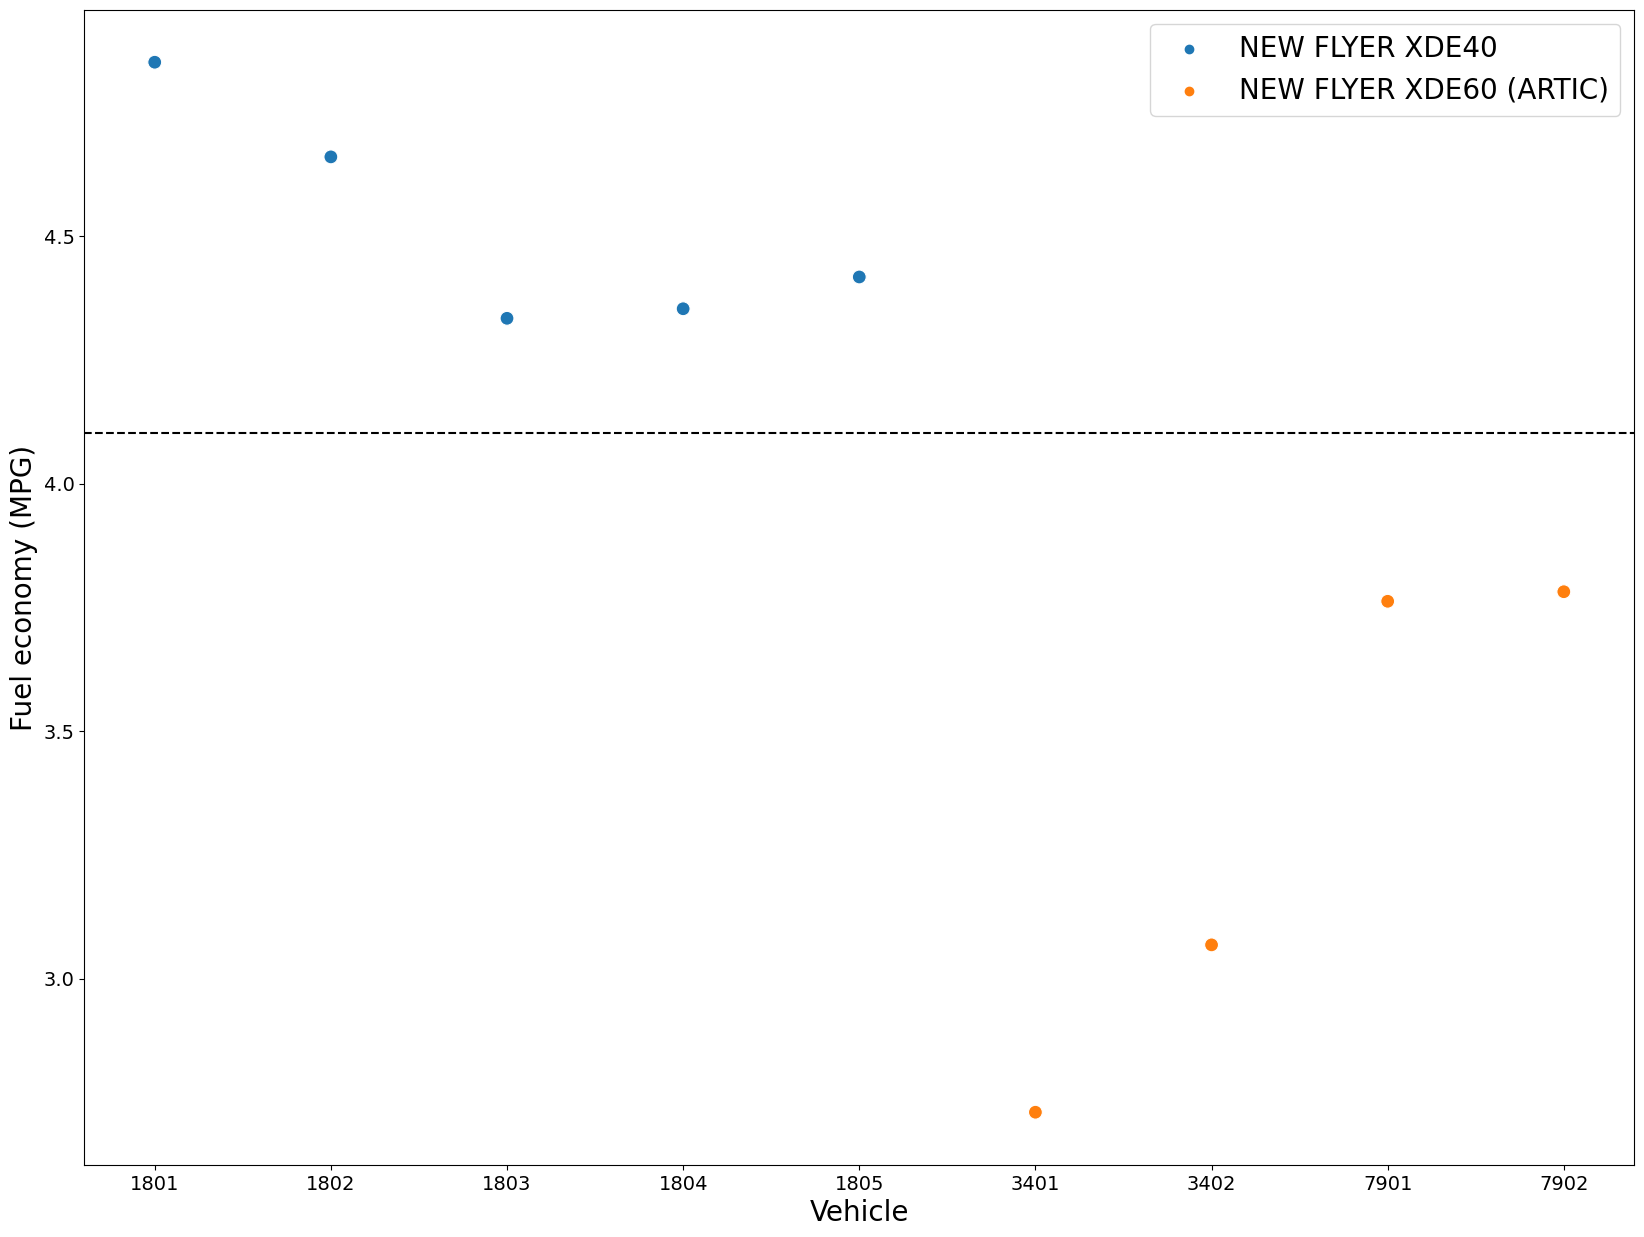

In [132]:
# Plot fuel rate by vehicle (Hybrid)
fig, ax = plt.subplots(figsize=(20,15))
df_hybrid_integerated.sort_values(by=['VehicleModel'], inplace=True)
df_hybrid_integerated['Vehicle'] = df_hybrid_integerated.Vehicle.astype(str)
df_hybrid_integerated_grouped = df_hybrid_integerated.groupby(['Vehicle']).agg({'fuel_economy': ['mean'],'VehicleModel':['max']}).reset_index()
df_hybrid_integerated_grouped.columns = df_hybrid_integerated_grouped.columns.droplevel(1)
sns.scatterplot(x='Vehicle', y='fuel_economy', data=df_hybrid_integerated_grouped, hue='VehicleModel', s=100)
plt.axhline(df_hybrid_integerated['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Vehicle', fontsize=20)
plt.ylabel('Fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-hybrid-per-vehicle.png', dpi=400, bbox_inches='tight')